In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix


In [2]:
#getting the cleaned dataset
dataset = pd.read_csv("Clean2019Data.csv")
dataset.shape

(255176, 20)

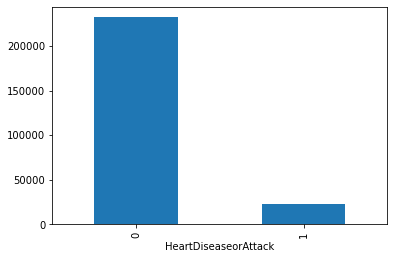

In [3]:
y_value = dataset[['HeartDiseaseorAttack']]

target_count = y_value.value_counts()

target_count.plot(kind='bar', xticks = (0, 1));

In [4]:
y_value.value_counts()

HeartDiseaseorAttack
0.0                     232218
1.0                      22958
dtype: int64

In [5]:
train, test = train_test_split(dataset, test_size = 0.2)

In [6]:
train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]
train_response.shape

test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]
test_response.shape

(51036, 1)

# Using Logistic Regression


In [7]:
#same as above, but splitting the whole dataset into train test set instead of response + variable
lr = LogisticRegression(solver = 'lbfgs', max_iter= 254972)


In [8]:
train_response.shape

(204140, 1)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9117909277946508

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9117681636491888



<AxesSubplot:>

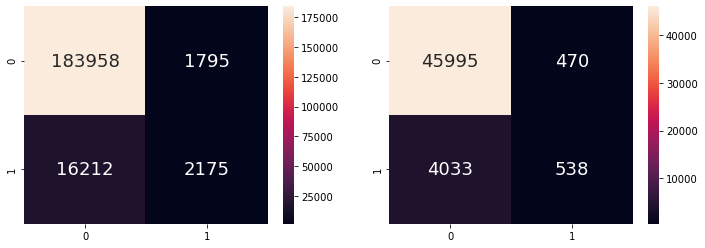

In [9]:
#finding out score of the fit on train set using all predictors
lr.fit(train_predictors, train_response.values.ravel())
#finding out score of the fit on TEST set using all predictors
LR_noOver_score = lr.score(test_predictors, test_response)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", lr.score(train_predictors, train_response))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", LR_noOver_score)
print()

#checking out the confusion matrix on TRAIN set
f, axes = plt.subplots(1, 2, figsize=(12, 4))

#confusion matrix heatmap again to check true positives
HD_predict = lr.predict(train_predictors)
cm = confusion_matrix(train_response, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = lr.predict(test_predictors)
cm_LR_noOver = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(cm_LR_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [10]:
CM_test = confusion_matrix(test_response, HD_test_predict)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_LR_noOver = F1_Score[1]

TPR = TP/(TP+FN)

LR_noOver_tpr = TPR[1]

print(f"The true positive rate is: {LR_noOver_tpr}")
print(f"The F1-Score is: {F1_LR_noOver}")


The true positive rate is: 0.11769853423758478
The F1-Score is: 0.19286610503674495


# Using Decision tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9108601939845204

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9112979073595109



<AxesSubplot:>

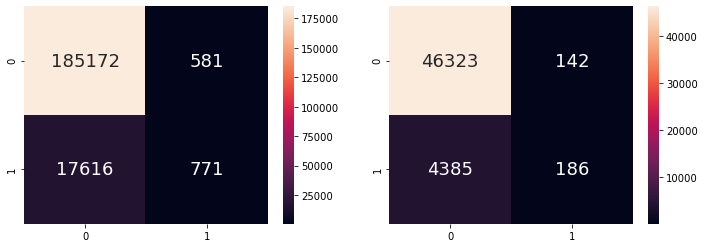

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]

test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(train_predictors, train_response)    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(train_predictors)
y_test_pred = dectree.predict(test_predictors)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(train_predictors, train_response))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
DT_noOver_score = dectree.score(test_predictors, test_response)
print("Classification Accuracy \t:", DT_noOver_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_response, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

cm_DT_noOver = confusion_matrix(test_response, y_test_pred)
sb.heatmap(cm_DT_noOver, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [12]:
CM_test = confusion_matrix(test_response, y_test_pred)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_DT_noOver = F1_Score[1]

TPR = TP/(TP+FN)

DT_noOver_tpr = TPR[1]

print(f"The true positive rate is: {DT_noOver_tpr}")
print(f"The F1-Score is: {F1_DT_noOver}")


The true positive rate is: 0.04069131481076351
The F1-Score is: 0.07593386405388855


# Using Random Forest Regression

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9867492897031449

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9049102594247198



<AxesSubplot:>

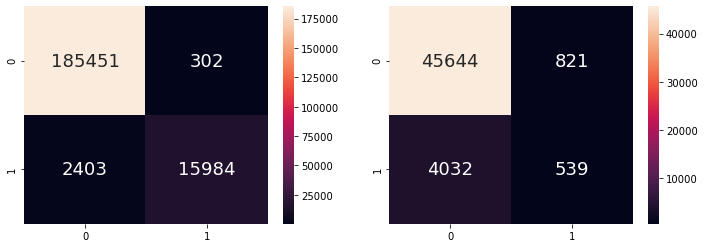

In [13]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(train_predictors, train_response.values.ravel())

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(train_predictors, train_response))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
rf_noOver_score = rfc.score(test_predictors, test_response)
print("Classification Accuracy \t:", rf_noOver_score)
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_predict = rfc.predict(train_predictors)
cm = confusion_matrix(train_response, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = rfc.predict(test_predictors)
rf_noOver = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(rf_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [14]:
FP = rf_noOver.sum(axis=0) - np.diag(rf_noOver)  
FN = rf_noOver.sum(axis=1) - np.diag(rf_noOver)
TP = np.diag(rf_noOver)
TN = rf_noOver.sum() - (FP + FN + TP)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_RF_noOver = F1_Score[1]

TPR = TP/(TP+FN)

RF_noOver_tpr = TPR[1]

print(f"The true positive rate is: {RF_noOver_tpr}")

print(f"The F1-Score is: {F1_RF_noOver}")

The true positive rate is: 0.11791730474732007
The F1-Score is: 0.1817568706794807


# Using Decision tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9108601939845204

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9112979073595109



<AxesSubplot:>

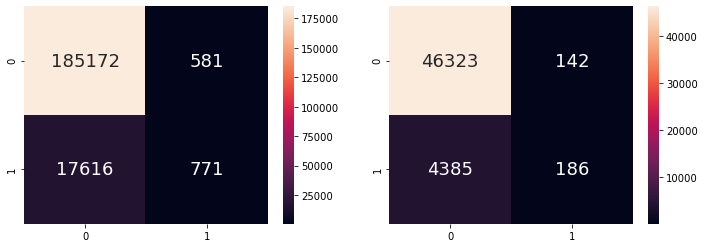

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]

test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(train_predictors, train_response)    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(train_predictors)
y_test_pred = dectree.predict(test_predictors)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(train_predictors, train_response))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
DT_noOver_score = dectree.score(test_predictors, test_response)
print("Classification Accuracy \t:", DT_noOver_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_response, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

cm_DT_noOver = confusion_matrix(test_response, y_test_pred)
sb.heatmap(cm_DT_noOver, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [16]:
FP = cm_DT_noOver.sum(axis=0) - np.diag(cm_DT_noOver)  
FN = cm_DT_noOver.sum(axis=1) - np.diag(cm_DT_noOver)
TP = np.diag(cm_DT_noOver)
TN = cm_DT_noOver.sum() - (FP + FN + TP)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_DT_noOver = F1_Score[1]

TPR = TP/(TP+FN)

DT_noOver_tpr = TPR[1]

print(f"The true positive rate is: {DT_noOver_tpr}")

print(f"The F1-Score is: {F1_DT_noOver}")

The true positive rate is: 0.04069131481076351
The F1-Score is: 0.07593386405388855


# Using Support Vector Classification with C=1.0

In [17]:
from sklearn import preprocessing
train_predictors = preprocessing.scale(train_predictors) # Preprocessing is to standardise the set
train_predictors.shape

(204140, 19)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9113157636915842

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.911728975625049



<AxesSubplot:>

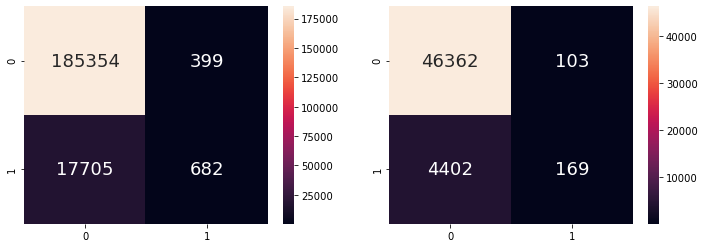

In [18]:
svc = LinearSVC(C=1.0, max_iter=203977)
svc.fit(train_predictors, train_response.values.ravel())

test_predictors = preprocessing.scale(test_predictors)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", svc.score(train_predictors, train_response))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
svc_noOver_score = svc.score(test_predictors, test_response)
print("Classification Accuracy \t:", svc_noOver_score)
print()

#checking out the confusion matrix on TRAIN set
f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_predict = svc.predict(train_predictors)
cm = confusion_matrix(train_response, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = svc.predict(test_predictors)
svc_noOver = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(svc_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [19]:
FP = svc_noOver.sum(axis=0) - np.diag(svc_noOver)  
FN = svc_noOver.sum(axis=1) - np.diag(svc_noOver)
TP = np.diag(svc_noOver)
TN = svc_noOver.sum() - (FP + FN + TP)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_svc_noOver = F1_Score[1]

TPR = TP/(TP+FN)

svc_noOver_tpr = TPR[1]

print(f"The true positive rate is: {svc_noOver_tpr}")

print(f"The F1-Score is: {F1_svc_noOver}")

The true positive rate is: 0.036972216145263616
The F1-Score is: 0.06979145157959941


# Creating oversampling data

In [20]:
HD_0, HD_1 = train['HeartDiseaseorAttack'].value_counts()

HD_class_0 = train[train['HeartDiseaseorAttack'] == 0]
HD_class_1 = train[train['HeartDiseaseorAttack'] == 1]

print(f"No Heart Disease: {HD_0}")
print(f"Has Heart Disease: {HD_1}")

# Oversample people with heart disease
df_class_1_over = HD_class_1.sample(HD_0, replace=True)
df_test_over = pd.concat([HD_class_0, df_class_1_over], axis=0)

df_test_over.shape

No Heart Disease: 185753
Has Heart Disease: 18387


(371506, 20)

In [21]:
df_test_over['HeartDiseaseorAttack'].value_counts()

0.0    185753
1.0    185753
Name: HeartDiseaseorAttack, dtype: int64

In [22]:
X_train = df_test_over.iloc[:,1:]
y_train = df_test_over[['HeartDiseaseorAttack']]

X_test = test.iloc[:,1:]
y_test = test[['HeartDiseaseorAttack']]

In [23]:
X_train.shape

(371506, 19)

# Logistic Regression with Random Oversampling

Logistic Regression gives a score of 0.7716833644678687 for the train set.
Logistic Regression gives a score of 0.7504898503017478 for the test set.


<AxesSubplot:>

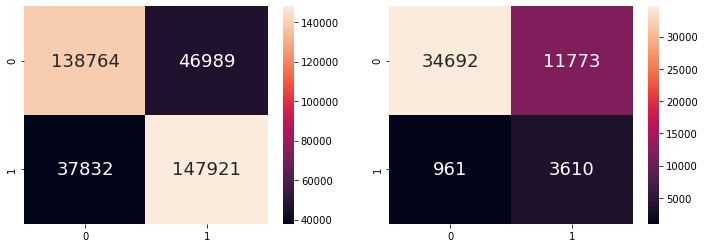

In [24]:
train_predictors = X_train
train_response = y_train

test_predictors = X_test
test_response = y_test

lr.fit(train_predictors, train_response.values.ravel())
print(f"Logistic Regression gives a score of {lr.score(train_predictors, train_response)} for the train set.")


LR_Over_score = lr.score(test_predictors, test_response)
print(f"Logistic Regression gives a score of {LR_Over_score} for the test set.")

f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_train_predict = lr.predict(train_predictors)
cm = confusion_matrix(train_response, HD_train_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = lr.predict(test_predictors)
cm_LR_over = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(cm_LR_over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [25]:
CM_test = confusion_matrix(test_response, HD_test_predict)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_LR_Over = F1_Score[1]

TPR = TP/(TP+FN)

LR_Over_tpr = TPR[1]

print(f"The true positive rate is: {LR_Over_tpr}")

print(f"The F1-Score is: {F1_LR_Over}")

The true positive rate is: 0.7897615401443885
The F1-Score is: 0.36183221409241256


## Random Forest with Random Oversampling

Random Forest gives a score of 0.9795777187986197 for the train set.
Random Forest gives a score of 0.87832118504585 for the test set.


<AxesSubplot:>

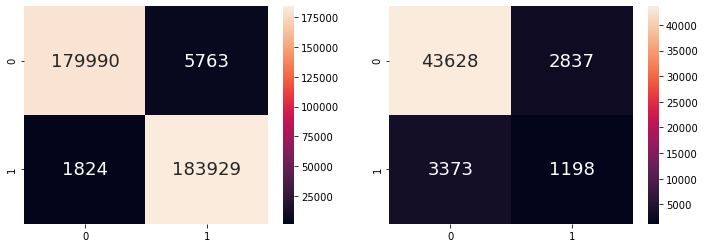

In [26]:
rfc.fit(train_predictors, train_response.values.ravel())
print(f"Random Forest gives a score of {rfc.score(train_predictors, train_response)} for the train set.")

rf_Over_score = rfc.score(test_predictors, test_response)
print(f"Random Forest gives a score of {rf_Over_score} for the test set.")

f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_predict = rfc.predict(train_predictors)
cm = confusion_matrix(train_response, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = rfc.predict(test_predictors)
rf_Over = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(rf_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [27]:
FP = rf_Over.sum(axis=0) - np.diag(rf_Over)  
FN = rf_Over.sum(axis=1) - np.diag(rf_Over)
TP = np.diag(rf_Over)
TN = rf_Over.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)

rf_Over_tpr = TPR[1]

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_rf_Over = F1_Score[1]
print(f"The true positive rate is: {rf_Over_tpr}")
print(f"The F1-Score is: {F1_rf_Over}")



The true positive rate is: 0.2620870706628746
The F1-Score is: 0.27841041134092487


## SVC with Random Oversampling


In [28]:
train_predictors = preprocessing.scale(train_predictors) # Preprocessing is to standardise the set
test_predictors = preprocessing.scale(test_predictors)

SVC gives a score of 0.7716725974816019 for the train set.
SVC gives a score of 0.5986950387961439 for the test set.


<AxesSubplot:>

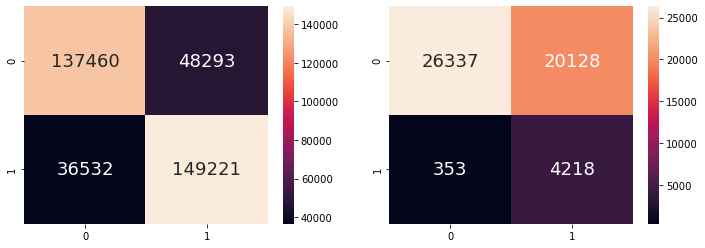

In [29]:
svc.fit(train_predictors, train_response.values.ravel())
print(f"SVC gives a score of {svc.score(train_predictors, train_response)} for the train set.")

svc_Over_score = svc.score(test_predictors, test_response)
print(f"SVC gives a score of {svc_Over_score} for the test set.")

f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_predict = svc.predict(train_predictors)
cm = confusion_matrix(train_response, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = svc.predict(test_predictors)
svc_Over = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(svc_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [30]:
FP = svc_Over.sum(axis=0) - np.diag(svc_Over)  
FN = svc_Over.sum(axis=1) - np.diag(svc_Over)
TP = np.diag(svc_Over)
TN = svc_Over.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)

svc_Over_tpr = TPR[1]

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_svc_Over = F1_Score[1]
print(f"The true positive rate is: {svc_Over_tpr}")
print(f"The F1-Score is: {F1_svc_Over}")



The true positive rate is: 0.9227740100634434
The F1-Score is: 0.291731507417782


# Decision Tree with Random Oversampling

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7359692710211948

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6466219923191473



<AxesSubplot:>

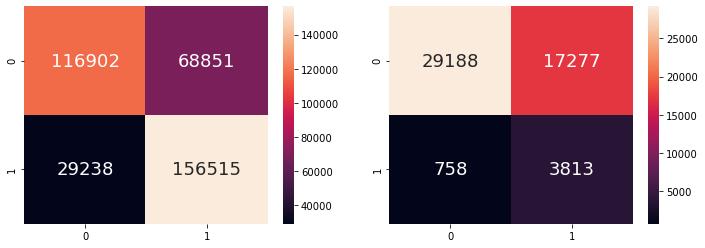

In [31]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
DT_Over_score = dectree.score(X_test, y_test)
print("Classification Accuracy \t:", DT_Over_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

cm_DT_Over = confusion_matrix(y_test, y_test_pred)
sb.heatmap(cm_DT_Over, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [32]:
CM_test = confusion_matrix(y_test, y_test_pred)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

DT_Over_tpr = TPR[1]

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_DT_Over = F1_Score[1]

print(f"The true positive rate is: {DT_Over_tpr}")
print(f"The F1-Score is: {F1_DT_Over}")

The true positive rate is: 0.8341719536206519
The F1-Score is: 0.2971824948365223


# Using SMOTE and logistic regression


In [33]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7824584259742776

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7547613449329885



<AxesSubplot:>

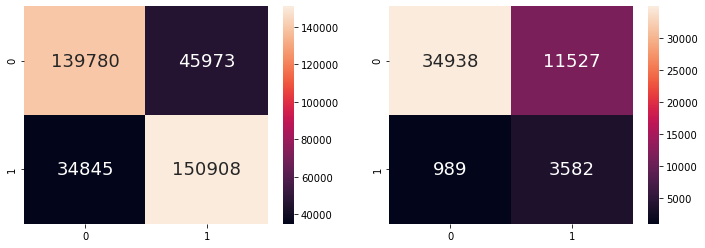

In [34]:
train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]

test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]

sm = SMOTE(sampling_strategy = 'minority')
Xsm_train, ysm_train = sm.fit_resample(train_predictors, train_response)

smote = LogisticRegression(solver='lbfgs', max_iter= 254972).fit(Xsm_train, ysm_train.values.ravel())

smote_pred = smote.predict(X_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(ysm_train, smote.predict(Xsm_train)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
smote_score = accuracy_score(test_response, smote_pred)
print("Classification Accuracy \t:", smote_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ysm_train, smote.predict(Xsm_train)),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

LR_smote = confusion_matrix(test_response, smote_pred)
sb.heatmap(LR_smote, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [35]:
CM_test = LR_smote

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

smote_tpr = TPR[1]
print(f"The true positive rate is: {smote_tpr}")

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_smoteLR_Over = F1_Score[1]

print(f"The F1-Score is: {F1_smoteLR_Over}")

The true positive rate is: 0.7836359658718005
The F1-Score is: 0.36402439024390243


# Using SMOTE and Random Forest

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9899382513337605

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8986009875382083



<AxesSubplot:>

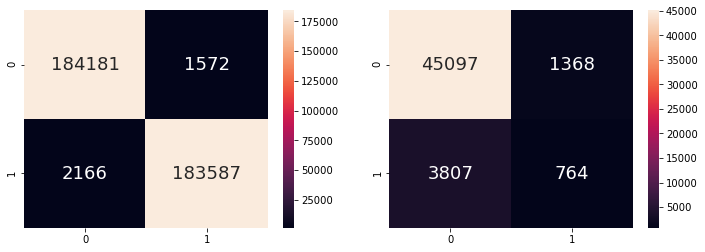

In [36]:
rfc.fit(Xsm_train, ysm_train.values.ravel())

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(Xsm_train, ysm_train.values.ravel()))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
rf_SMOTE_score = rfc.score(X_test, y_test)
print("Classification Accuracy \t:", rf_SMOTE_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ysm_train, rfc.predict(Xsm_train)),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = rfc.predict(test_predictors)
rf_SMOTE = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(rf_SMOTE, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [37]:
FP = rf_SMOTE.sum(axis=0) - np.diag(rf_SMOTE)  
FN = rf_SMOTE.sum(axis=1) - np.diag(rf_SMOTE)
TP = np.diag(rf_SMOTE)
TN = rf_SMOTE.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)

rf_SMOTE_tpr = TPR[1]

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_rf_SMOTE = F1_Score[1]

print(f"The true positive rate is: {rf_SMOTE_tpr}")
print(f"The F1-Score is: {F1_rf_SMOTE}")



The true positive rate is: 0.1671406694377598
The F1-Score is: 0.22795763091153215


# Using SMOTE and Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.783222881999214

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7172779998432479



<AxesSubplot:>

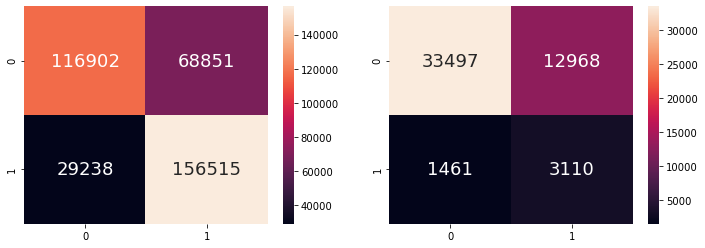

In [38]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(Xsm_train, ysm_train.values.ravel()) # train the decision tree model

# Predict Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Xsm_train, ysm_train.values.ravel()))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
DT_SMOTE_score = dectree.score(X_test, y_test)
print("Classification Accuracy \t:", DT_SMOTE_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

cm_DT_SMOTE = confusion_matrix(y_test, y_test_pred)
sb.heatmap(cm_DT_SMOTE, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [39]:
FP = cm_DT_SMOTE.sum(axis=0) - np.diag(cm_DT_SMOTE)  
FN = cm_DT_SMOTE.sum(axis=1) - np.diag(cm_DT_SMOTE)
TP = np.diag(cm_DT_SMOTE)
TN = cm_DT_SMOTE.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)

DT_SMOTE_tpr = TPR[1]

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_dt_SMOTE = F1_Score[1]

print(f"The true positive rate is: {DT_SMOTE_tpr}")
print(f"The F1-Score is: {F1_dt_SMOTE}")


The true positive rate is: 0.6803762852767447
The F1-Score is: 0.3012252409317642


# Using SMOTE and SVC

In [40]:
train_predictors = preprocessing.scale(Xsm_train) # Preprocessing is to standardise the set
test_predictors = preprocessing.scale(test_predictors)

In [41]:
svc.fit(train_predictors, ysm_train.values.ravel())

LinearSVC(max_iter=203977)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7824745764536777

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5971667058546908



<AxesSubplot:>

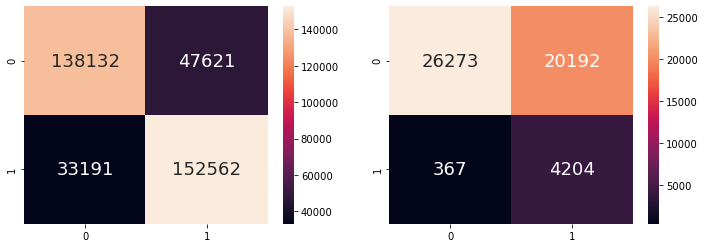

In [42]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", svc.score(train_predictors, ysm_train.values.ravel()))
print()

print("Goodness of Fit of Model \tTest Dataset")
svc_SMOTE_score = svc.score(test_predictors, test_response)
print("Classification Accuracy \t:", svc_SMOTE_score)
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_predict = svc.predict(train_predictors)
cm = confusion_matrix(ysm_train, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = svc.predict(test_predictors)
svc_smote= confusion_matrix(test_response, HD_test_predict)
sb.heatmap(svc_smote, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [43]:
FP = svc_Over.sum(axis=0) - np.diag(svc_Over)  
FN = svc_Over.sum(axis=1) - np.diag(svc_Over)
TP = np.diag(svc_Over)
TN = svc_Over.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)

svc_smote_tpr = TPR[1]

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1_Score = (2*Precision*Recall)/(Precision + Recall)
F1_svc_smote = F1_Score[1]
print(f"The true positive rate is: {svc_smote_tpr}")
print(f"The F1-Score is: {F1_svc_smote}")



The true positive rate is: 0.9227740100634434
The F1-Score is: 0.291731507417782


# Comparison of Models

Text(0.5, 1.0, 'SVC Tree with SMOTE')

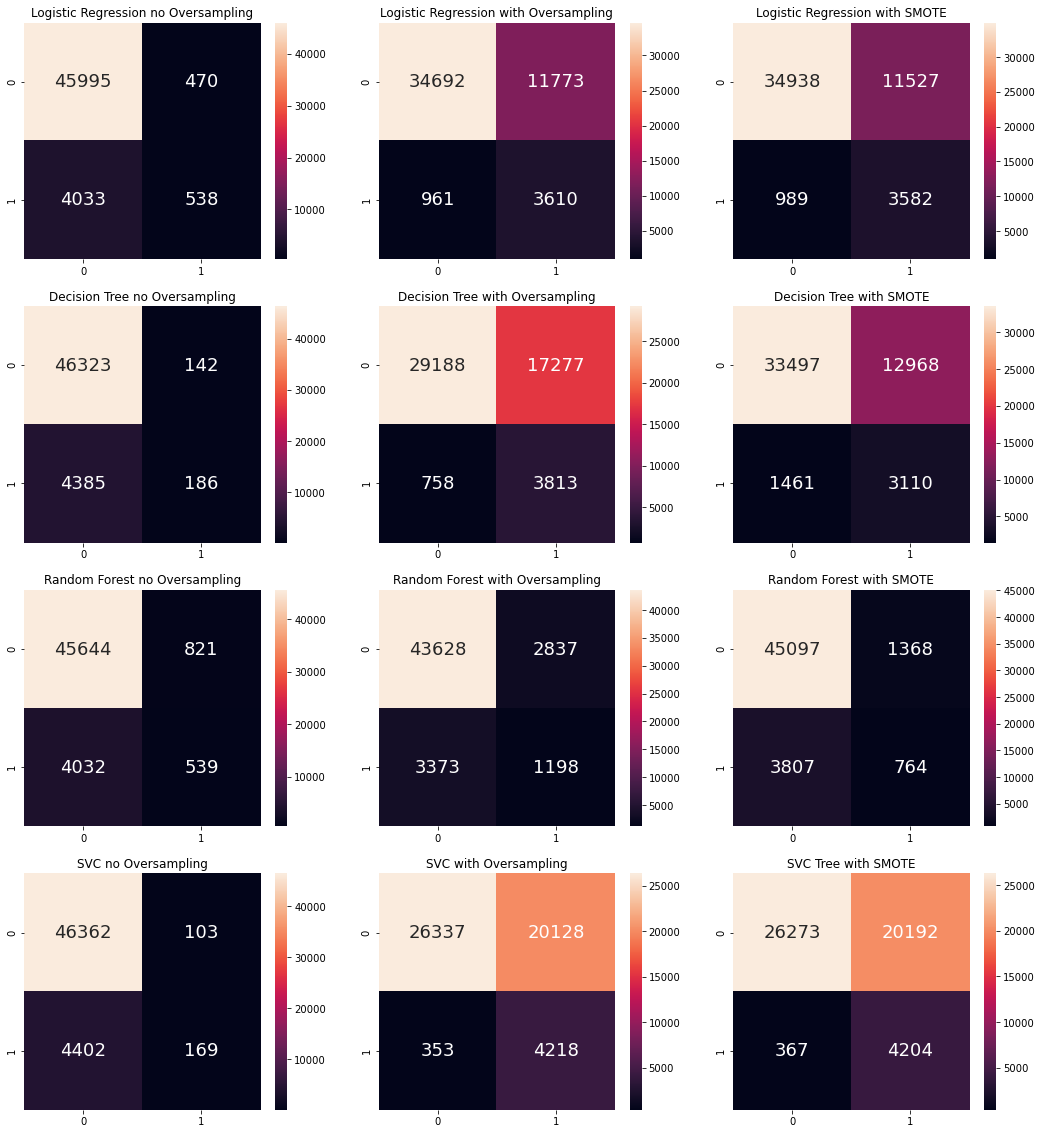

In [44]:
f, axes = plt.subplots(4, 3, figsize=(18, 20))

sb.heatmap(cm_LR_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][0])
sb.heatmap(cm_LR_over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][1])
sb.heatmap(LR_smote, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][2])


sb.heatmap(cm_DT_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][0])
sb.heatmap(cm_DT_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][1])
sb.heatmap(cm_DT_SMOTE, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][2])

sb.heatmap(rf_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[2][0])
sb.heatmap(rf_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[2][1])
sb.heatmap(rf_SMOTE, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[2][2])

sb.heatmap(svc_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[3][0])
sb.heatmap(svc_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[3][1])
sb.heatmap(svc_smote, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[3][2])

axes[0, 0].set_title("Logistic Regression no Oversampling")
axes[0, 1].set_title("Logistic Regression with Oversampling")
axes[0, 2].set_title("Logistic Regression with SMOTE")

axes[1, 0].set_title("Decision Tree no Oversampling")
axes[1, 1].set_title("Decision Tree with Oversampling")
axes[1, 2].set_title("Decision Tree with SMOTE")

axes[2, 0].set_title("Random Forest no Oversampling")
axes[2, 1].set_title("Random Forest with Oversampling")
axes[2, 2].set_title("Random Forest with SMOTE")


axes[3, 0].set_title("SVC no Oversampling")
axes[3, 1].set_title("SVC with Oversampling")
axes[3, 2].set_title("SVC Tree with SMOTE")

In [46]:
print(f"\t Logistic Regression no Oversampling\n Classification Accuracy: {LR_noOver_score}\n True Positive Rate is: {LR_noOver_tpr}\n F1-Score: {F1_LR_noOver}")
print(f"\tLogistic Regression with Oversampling\n Classification Accuracy: {LR_Over_score}\n True Positive Rate is: {LR_Over_tpr}\n F1-Score: {F1_LR_Over}")
print(f"\tLogistic Regression with SMOTE\n Classification Accuracy:: {smote_score}\n True Positive Rate is: {smote_tpr}\n F1-Score: {F1_smoteLR_Over}")
print()

print(f"\tDecision Tree no Oversampling\n Classification Accuracy: {DT_noOver_score}\n True Positive Rate is: {DT_noOver_tpr}\n F1-Score: {F1_DT_noOver}")
print(f"\tDecision Tree with Oversampling\n Classification Accuracy: {DT_Over_score}\n True Positive Rate is: {DT_Over_tpr}\n F1-Score: {F1_DT_Over}")
print(f"\tDecision Tree with SMOTE\n Classification Accuracy: {DT_SMOTE_score}\n True Positive Rate is: {DT_SMOTE_tpr}\n F1-Score: {F1_dt_SMOTE}")
print()

print(f"\tRandom Forest no Oversampling\n Classification Accuracy: {rf_noOver_score}\n True Positive Rate is: {RF_noOver_tpr}\n F1-Score: {F1_RF_noOver}")
print(f"\tRandom Forest with Oversampling\n Classification Accuracy: {rf_Over_score}\n True Positive Rate is: {rf_Over_tpr}\n F1-Score: {F1_rf_Over}")
print(f"\tRandom Forest with SMOTE\n Classification Accuracy: {rf_SMOTE_score}\n True Positive Rate is: {rf_SMOTE_tpr}\n F1-Score: {F1_rf_SMOTE}")
print()

print(f"\tSVC with no Oversampling\n Classification Accuracy: {svc_noOver_score}\n True Positive Rate is: {svc_noOver_tpr}\n F1-Score: {F1_svc_noOver}")
print(f"\tSVC with Oversampling\n Classification Accuracy: {svc_Over_score}\n True Positive Rate is: {svc_Over_tpr}\n F1-Score: {F1_svc_Over}")
print(f"\tSVC with SMOTE\n Classification Accuracy: {svc_SMOTE_score}\n True Positive Rate is: {svc_smote_tpr}\n F1-Score: {F1_svc_smote}")




	 Logistic Regression no Oversampling
 Classification Accuracy: 0.9117681636491888
 True Positive Rate is: 0.11769853423758478
 F1-Score: 0.19286610503674495
	Logistic Regression with Oversampling
 Classification Accuracy: 0.7504898503017478
 True Positive Rate is: 0.7897615401443885
 F1-Score: 0.36183221409241256
	Logistic Regression with SMOTE
 Classification Accuracy:: 0.7547613449329885
 True Positive Rate is: 0.7836359658718005
 F1-Score: 0.36402439024390243

	Decision Tree no Oversampling
 Classification Accuracy: 0.9112979073595109
 True Positive Rate is: 0.04069131481076351
 F1-Score: 0.07593386405388855
	Decision Tree with Oversampling
 Classification Accuracy: 0.6466219923191473
 True Positive Rate is: 0.8341719536206519
 F1-Score: 0.2971824948365223
	Decision Tree with SMOTE
 Classification Accuracy: 0.7172779998432479
 True Positive Rate is: 0.6803762852767447
 F1-Score: 0.3012252409317642

	Random Forest no Oversampling
 Classification Accuracy: 0.9049102594247198
 True Po